In [1]:
import pandas as pd
import re
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas import DataFrame

In [2]:
aisles = pd.read_csv('aisles.csv',encoding='gb18030')
departments = pd.read_csv('departments.csv',encoding='gb18030')
order_products__test = pd.read_csv('order_products__test.csv',encoding='gb18030')
order_products__train = pd.read_csv('order_products__train.csv',encoding='gb18030')
orders = pd.read_csv('orders.csv',encoding='gb18030')
products = pd.read_csv('products.csv',encoding='gb18030')

In [3]:
aisles

,aisle_id,aisle
0,103.0,1_!ice68'_cream68'_toppings
1,198.0,10_!aguadilla68'_barless68'_buck
2,8.0,10_!bakery68'_desserts
3,93.0,104_!breakfast68'_bakery
4,231.0,105_!dunoon68'_edgewater68'_enlightenedly
...,...,...
282,135.0,974_!lenticle68'_loutishly68'_noninductive
283,13.0,981_!prepared68'_meals
284,81.0,983_!canned68'_jarred68'_vegetables
285,100.0,985_!missing


In [4]:
aisles['aisle'] = aisles['aisle'].str.replace('\W','', regex = True)
aisles['aisle'] = aisles['aisle'].str.replace('\d+', '', regex=True)
aisles['aisle'] = aisles['aisle'].str.replace('_', ' ')

In [5]:
# handle aisles

In [6]:
aisles

,aisle_id,aisle
0,103.0,ice cream toppings
1,198.0,aguadilla barless buck
2,8.0,bakery desserts
3,93.0,breakfast bakery
4,231.0,dunoon edgewater enlightenedly
...,...,...
282,135.0,lenticle loutishly noninductive
283,13.0,prepared meals
284,81.0,canned jarred vegetables
285,100.0,missing


In [4]:
ids1 = aisles["aisle_id"]
aisles[ids1.isin(ids1[ids1.duplicated()])].sort_values("aisle_id")

# kindliness menostaxis mowrah delete
# guns ammo crossbows delete

# televisions speakers mounts delete because in the csv file products, 
# it shows things related to doughs gelatins bake mixes 
# instead of televisons speakers mounts

,aisle_id,aisle
47,25.0,231_!kindliness68'_menostaxis68'_mowrah
135,25.0,497_!soap
151,68.0,546_!guns68'_ammo68'_crossbows
160,68.0,571_!bulk68'_grains68'_rice68'_dried68'_goods
27,105.0,177_!televisions68'_speakers68'_mounts68'_
59,105.0,270_!doughs68'_gelatins68'_bake68'_mixes


In [8]:
aisles_duplicate_deleted = aisles.drop(aisles.index[47])
aisles_duplicate_deleted = aisles_duplicate_deleted.drop(aisles.index[151])
aisles_duplicate_deleted = aisles_duplicate_deleted.drop(aisles.index[27])

In [9]:
# aisles_duplicate_deleted.iloc[40:50]
# aisles_duplicate_deleted.iloc[148:155]
aisles_duplicate_deleted   #the right csv file for "aisles"

,aisle_id,aisle
0,103.0,ice cream toppings
1,198.0,aguadilla barless buck
2,8.0,bakery desserts
3,93.0,breakfast bakery
4,231.0,dunoon edgewater enlightenedly
...,...,...
282,135.0,lenticle loutishly noninductive
283,13.0,prepared meals
284,81.0,canned jarred vegetables
285,100.0,missing


In [12]:
# aisles_duplicate_deleted.iloc[45:50]

aisles_duplicate_deleted.iloc[148:153]
# aisles_duplicate_deleted.iloc[25:30]



,aisle_id,aisle
150,136.0,obttropistic oxygenic parure
152,69.0,soup broth bouillon
153,143.0,eyry sulker indefensibility
154,199.0,callose cooncan tayra
155,224.0,hosel immunoreaction idealiser


In [10]:
# handle departments

In [11]:
departments # try to figure out what is the department named "other" and "missing"

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,illegal drugs
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta


In [12]:
ids2 = departments["department_id"]
departments[ids2.isin(ids2[ids2.duplicated()])].sort_values("department_id")

# illegal drugs delete
# nuclear missles delete

,department_id,department
5,6,illegal drugs
6,6,international
18,18,babies
19,18,nuclear missles


In [13]:
departments_duplicate_deleted = departments.drop(departments.index[5])
departments_duplicate_deleted = departments_duplicate_deleted.drop(departments.index[19])

In [14]:
departments_duplicate_deleted  #the right csv file for "departments"

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta
10,10,bulk


In [15]:
# other:  
# guess: maybe they are the things which have not been sent to the corresponding department now
#     Camilia, Single Liquid Doses
#     Arrowroot Powder
#     Rescue Remedy
#     Sunset Blush
#     Pink Moscato California
#     Agar Agar Powder
#     Poly-Vi-Sol Infants And Toddlers Multivitamin Supplement Drops
#     Pink Moscato
#     Coconut Lime Frozen Pop Dairy Free Gluten Free
#     Melatonin, Fast Dissolve, 5 mg, Tablets, Natural Strawberry Flavor & Sweeteners
#     Zen Party Mix
#     Baby's Vitamin D3
#     Vegetable Burger Falafil Mix
#     Whole Bay Leaves

In [ ]:
“other” example:  
    Camilia, Single Liquid Doses
    Arrowroot Powder
    Rescue Remedy
    Sunset Blush
    Pink Moscato California
    Agar Agar Powder
    Poly-Vi-Sol Infants And Toddlers Multivitamin Supplement Drops
    Pink Moscato
    Coconut Lime Frozen Pop Dairy Free Gluten Free
    Melatonin, Fast Dissolve, 5 mg, Tablets, Natural Strawberry Flavor & Sweeteners
    Zen Party Mix
    Baby's Vitamin D3
    Vegetable Burger Falafil Mix
    Whole Bay Leaves

In [16]:
products[35:40]  
# trying to figure out what is "21	missing"

,product_id,product_name,aisle_id,department_id
35,36,Traditional Lasagna with Meat Sauce Savory Ita...,38,1.0
36,37,Noodle Soup Mix With Chicken Broth,69,15.0
37,38,Ultra Antibacterial Dish Liquid,100,21.0
38,39,Daily Tangerine Citrus Flavored Beverage,64,7.0
39,40,Beef Hot Links Beef Smoked Sausage With Chile ...,106,12.0


In [17]:
# missing:
# guess: (1) maybe they are things which have been lost and existed before
#        (2) this product has been sold out
# 
#     Ultra Antibacterial Dish Liquid
#     Organic Honeycrisp Apples
#     Uncured Turkey Bologna
#     Write Bros Ball Point Pens, Cap-Pen, Medium (1.0 mm), Black Ink
#     Classics Baby Binks Easter Chocolate Bunny
#     Strawberry Cheesecake Nonfat Yogurt
#     Fancy Diced Hot Chilies

In [ ]:
“missing” example:
    Ultra Antibacterial Dish Liquid
    Organic Honeycrisp Apples
    Uncured Turkey Bologna
    Write Bros Ball Point Pens, Cap-Pen, Medium (1.0 mm), Black Ink
    Classics Baby Binks Easter Chocolate Bunny
    Strawberry Cheesecake Nonfat Yogurt
    Fancy Diced Hot Chilies

In [18]:
# aisles_duplicate_deleted.columns

# departments_duplicate_deleted


# order_products__test


# order_products__train


# orders 

# products


In [19]:
# all the dataframes have been reviewed fundamentally

# aisles_duplicate_deleted.columns
# Index(['aisle_id', 'aisle'], dtype='object')

# departments_duplicate_deleted.columns
# Index(['department_id', 'department'], dtype='object')

# order_products__test.columns
# Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

# order_products__train.columns
# Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

# orders.columns
# Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
#        'order_hour_of_day', 'days_since_prior_order'],
#        dtype='object')

# products.columns
# Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')

In [20]:
# start processing data

In [21]:
# Question 1: What is the total number of products ordered on each day of the week?

In [22]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [23]:
order_products__train

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [24]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19.0
1,2,All-Seasons Salt,104,13.0
2,3,Robust Golden Unsweetened Oolong Tea,94,7.0
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1.0
4,5,Green Chile Anytime Sauce,5,13.0
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5.0
49684,49685,En Croute Roast Hazelnut Cranberry,42,1.0
49685,49686,Artisan Baguette,112,3.0
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8.0


In [25]:
merged_orders_train = order_products__train.merge(orders[['order_id', 'order_dow']], on='order_id')
merged_orders_train

,order_id,product_id,add_to_cart_order,reordered,order_dow
0,2,33120,1,1,5
1,2,28985,2,1,5
2,2,9327,3,0,5
3,2,45918,4,1,5
4,2,30035,5,0,5
...,...,...,...,...,...
32434484,3421083,39678,6,1,2
32434485,3421083,11352,7,0,2
32434486,3421083,4600,8,0,2
32434487,3421083,24852,9,1,2


In [26]:
merged_orders_train_products = merged_orders_train.merge(products[['product_id', 'product_name']], on='product_id')
merged_orders_train_products

,order_id,product_id,add_to_cart_order,reordered,order_dow,product_name
0,2,33120,1,1,5,Organic Egg Whites
1,26,33120,5,0,0,Organic Egg Whites
2,120,33120,13,0,6,Organic Egg Whites
3,327,33120,5,1,6,Organic Egg Whites
4,390,33120,28,1,0,Organic Egg Whites
...,...,...,...,...,...,...
32434484,3265099,43492,3,0,3,Gourmet Burger Seasoning
32434485,3361945,43492,19,0,3,Gourmet Burger Seasoning
32434486,3267201,33097,2,0,3,Piquillo & Jalapeno Bruschetta
32434487,3393151,38977,32,0,4,Original Jerky


In [27]:
product_count_by_day = merged_orders_train_products.groupby('order_dow')['product_id'].count()
product_count_by_day

order_dow
0    6209666
1    5665856
2    4217798
3    3844117
4    3787215
5    4209533
6    4500304
Name: product_id, dtype: int64

In [28]:
merged_orders_train_products_duplicate = merged_orders_train_products.copy()
merged_orders_train_products_duplicate['duplicated'] = merged_orders_train_products_duplicate.duplicated()
merged_orders_train_products_duplicate

,order_id,product_id,add_to_cart_order,reordered,order_dow,product_name,duplicated
0,2,33120,1,1,5,Organic Egg Whites,False
1,26,33120,5,0,0,Organic Egg Whites,False
2,120,33120,13,0,6,Organic Egg Whites,False
3,327,33120,5,1,6,Organic Egg Whites,False
4,390,33120,28,1,0,Organic Egg Whites,False
...,...,...,...,...,...,...,...
32434484,3265099,43492,3,0,3,Gourmet Burger Seasoning,False
32434485,3361945,43492,19,0,3,Gourmet Burger Seasoning,False
32434486,3267201,33097,2,0,3,Piquillo & Jalapeno Bruschetta,False
32434487,3393151,38977,32,0,4,Original Jerky,False


In [29]:
merged_orders_train_products_duplicate_delete = merged_orders_train_products_duplicate.drop_duplicates()
merged_orders_train_products_duplicate_delete

,order_id,product_id,add_to_cart_order,reordered,order_dow,product_name,duplicated
0,2,33120,1,1,5,Organic Egg Whites,False
1,26,33120,5,0,0,Organic Egg Whites,False
2,120,33120,13,0,6,Organic Egg Whites,False
3,327,33120,5,1,6,Organic Egg Whites,False
4,390,33120,28,1,0,Organic Egg Whites,False
...,...,...,...,...,...,...,...
32434484,3265099,43492,3,0,3,Gourmet Burger Seasoning,False
32434485,3361945,43492,19,0,3,Gourmet Burger Seasoning,False
32434486,3267201,33097,2,0,3,Piquillo & Jalapeno Bruschetta,False
32434487,3393151,38977,32,0,4,Original Jerky,False


In [30]:
merged_orders_train_products_duplicate_delete[0:20]

,order_id,product_id,add_to_cart_order,reordered,order_dow,product_name,duplicated
0,2,33120,1,1,5,Organic Egg Whites,False
1,26,33120,5,0,0,Organic Egg Whites,False
2,120,33120,13,0,6,Organic Egg Whites,False
3,327,33120,5,1,6,Organic Egg Whites,False
4,390,33120,28,1,0,Organic Egg Whites,False
5,537,33120,2,1,2,Organic Egg Whites,False
6,582,33120,7,1,2,Organic Egg Whites,False
7,608,33120,5,1,3,Organic Egg Whites,False
8,623,33120,1,1,3,Organic Egg Whites,False
9,689,33120,4,1,1,Organic Egg Whites,False


In [31]:
# product_count_by_dayNew = merged_orders_train_products.groupby('order_dow')['product_id'].nunique()
# product_count_by_dayNew

# I do not think I should use nunique() here since it will only give me 
# the number of different product_id per day of the week
# But it is possible that different order_ids have the same product_id 
# and are ordered on the same day

In [32]:
product_count_by_day

order_dow
0    6209666
1    5665856
2    4217798
3    3844117
4    3787215
5    4209533
6    4500304
Name: product_id, dtype: int64

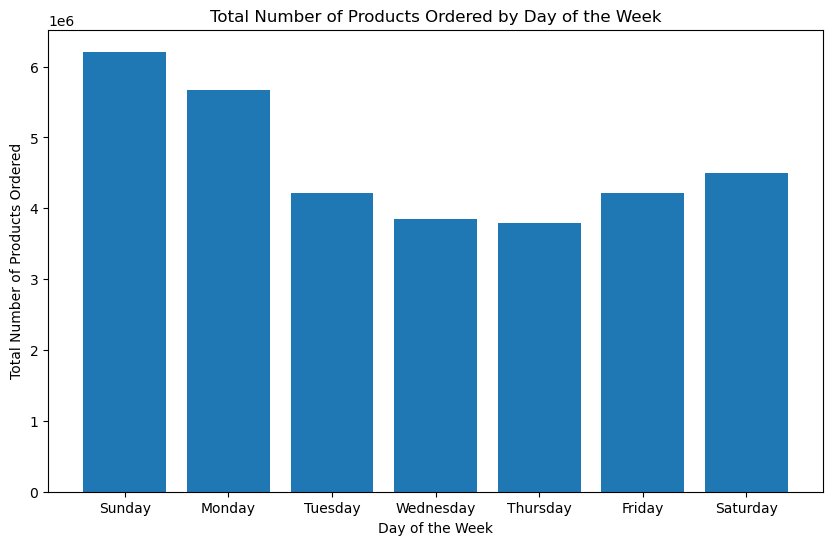

In [33]:
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Plotting the bar chart
plt.bar(product_count_by_day.index, product_count_by_day.values)

# Adding labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Total Number of Products Ordered')
plt.title('Total Number of Products Ordered by Day of the Week')

# Customizing the x-axis tick labels
days_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(product_count_by_day.index, days_of_week)

# Display the plot
plt.show()

In [34]:
# Question 2: What is the total number of orders on each day of the week?

In [35]:
# Merge orders and train those two dataframes
merged_orders_train = orders.merge(order_products__train, on='order_id')
merged_orders_train


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0
...,...,...,...,...,...,...,...,...,...,...
32434484,2977660,206209,prior,13,1,12,7.0,14197,5,1
32434485,2977660,206209,prior,13,1,12,7.0,38730,6,0
32434486,2977660,206209,prior,13,1,12,7.0,31477,7,0
32434487,2977660,206209,prior,13,1,12,7.0,6567,8,0


In [36]:
# Group by day of the week and count the number of orders
orders_per_day = merged_orders_train.groupby('order_dow')['order_id'].nunique()
orders_per_day

# I could use nunique here since it has no relation with the product_id
# It is possible that the same order_id has several products, and each time
# the user will be given a new order_id when they order something

order_dow
0    557772
1    556705
2    441955
3    412400
4    401212
5    425982
6    418848
Name: order_id, dtype: int64

In [37]:
# # Group by day of the week and count the number of orders
# orders_per_day = merged_orders_train.groupby('order_dow')['order_id'].count()
# orders_per_day


In [38]:
merged_orders_train_duplicate = merged_orders_train.copy()
merged_orders_train_duplicate['duplicated'] = merged_orders_train_duplicate.duplicated()
merged_orders_train_duplicate

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,duplicated
0,2539329,1,prior,1,2,8,NaN,196,1,0,False
1,2539329,1,prior,1,2,8,NaN,14084,2,0,False
2,2539329,1,prior,1,2,8,NaN,12427,3,0,False
3,2539329,1,prior,1,2,8,NaN,26088,4,0,False
4,2539329,1,prior,1,2,8,NaN,26405,5,0,False
...,...,...,...,...,...,...,...,...,...,...,...
32434484,2977660,206209,prior,13,1,12,7.0,14197,5,1,False
32434485,2977660,206209,prior,13,1,12,7.0,38730,6,0,False
32434486,2977660,206209,prior,13,1,12,7.0,31477,7,0,False
32434487,2977660,206209,prior,13,1,12,7.0,6567,8,0,False


In [39]:
merged_orders_train_duplicate_delete = merged_orders_train_duplicate.drop_duplicates()
merged_orders_train_duplicate_delete

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,duplicated
0,2539329,1,prior,1,2,8,NaN,196,1,0,False
1,2539329,1,prior,1,2,8,NaN,14084,2,0,False
2,2539329,1,prior,1,2,8,NaN,12427,3,0,False
3,2539329,1,prior,1,2,8,NaN,26088,4,0,False
4,2539329,1,prior,1,2,8,NaN,26405,5,0,False
...,...,...,...,...,...,...,...,...,...,...,...
32434484,2977660,206209,prior,13,1,12,7.0,14197,5,1,False
32434485,2977660,206209,prior,13,1,12,7.0,38730,6,0,False
32434486,2977660,206209,prior,13,1,12,7.0,31477,7,0,False
32434487,2977660,206209,prior,13,1,12,7.0,6567,8,0,False


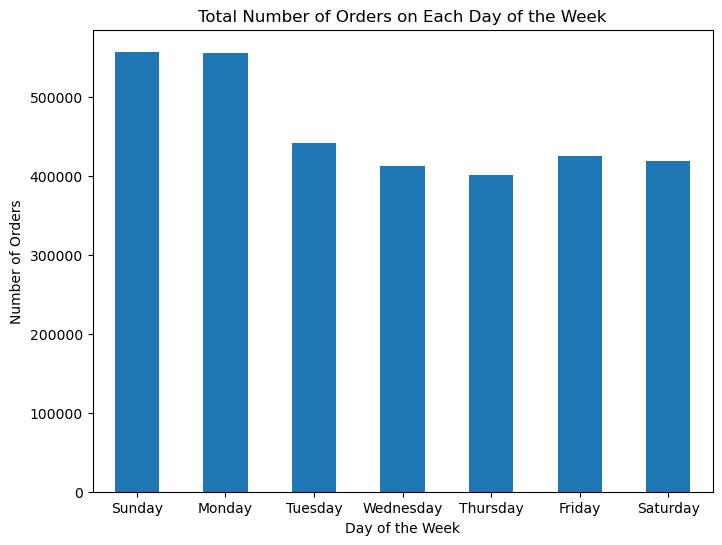

In [40]:
plt.figure(figsize=(8, 6))
orders_per_day.plot(kind='bar')

plt.title('Total Number of Orders on Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
days_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(product_count_by_day.index, days_of_week,rotation=0)

plt.show()

In [41]:
# Question 3: How many products are in each department
# different products

In [34]:
merged_departments_products = products.merge(departments_duplicate_deleted, on='department_id')
merged_departments_products



,product_id,product_name,aisle_id,department_id,department
0,1,Chocolate Sandwich Cookies,61,19.0,snacks
1,16,Mint Chocolate Flavored Syrup,103,19.0,snacks
2,25,Salted Caramel Lean Protein & Fiber Bar,3,19.0,snacks
3,32,Nacho Cheese White Bean Chips,107,19.0,snacks
4,41,Organic Sourdough Einkorn Crackers Rosemary,78,19.0,snacks
...,...,...,...,...,...
49679,43769,Organic Pearled Barley,68,10.0,bulk
49680,45682,Organic Turkish Apricots,68,10.0,bulk
49681,46889,Organic Brown Basmati Rice,68,10.0,bulk
49682,47489,Organic Brown Jasmine Rice,68,10.0,bulk


In [38]:
# Group by department and count the number of unique product IDs
products_per_department = merged_departments_products.groupby('department')['product_id'].nunique().reset_index(name='productNum')
products_per_department

,department,productNum
0,alcohol,1054
1,babies,1081
2,bakery,1516
3,beverages,4365
4,breakfast,1115
5,bulk,38
6,canned goods,2092
7,dairy eggs,3449
8,deli,1322
9,dry goods pasta,1858


In [44]:
products_per_departmentNew = products_per_department.drop(14)
products_per_departmentNew = products_per_departmentNew.drop(15)
products_per_departmentNew 
# New dataframe without the department missing and others

,department,productNum
0,alcohol,1054
1,babies,1081
2,bakery,1516
3,beverages,4365
4,breakfast,1115
5,bulk,38
6,canned goods,2092
7,dairy eggs,3449
8,deli,1322
9,dry goods pasta,1858


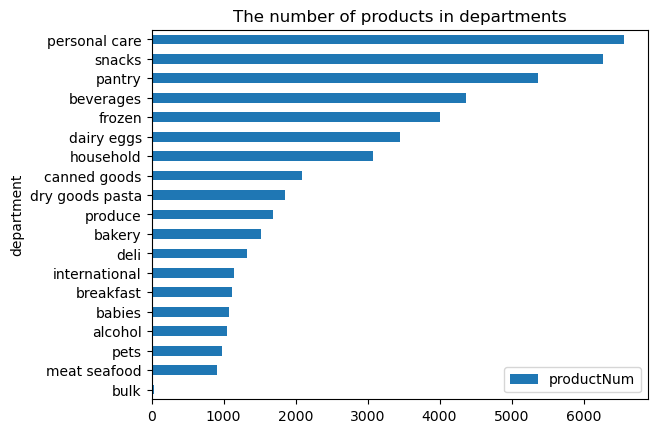

In [45]:
# plt.figure(figsize=(10, 6))
# products_per_department.sort_values(ascending=True).plot(kind='barh', color='blue')
# plt.title('Number of Products in Each Department')
# plt.xlabel('Number of Products')
# plt.ylabel('Department')

# plt.show()
products_per_departmentNew_sorted = products_per_departmentNew.sort_values(ascending = True, by = 'productNum')
# products_per_departmentNew_sorted

ax2 = products_per_departmentNew_sorted.plot(kind='barh',x='department', y='productNum', rot=0)
plt.title("The number of products in departments")
plt.show()

In [46]:
# Question 4: How many products are in each aisle?

In [47]:
merged_aisles_products = products.merge(aisles_duplicate_deleted, on='aisle_id')
merged_aisles_products

,product_id,product_name,aisle_id,department_id,aisle
0,1,Chocolate Sandwich Cookies,61,19.0,cookies cakes
1,78,Nutter Butter Cookie Bites Go-Pak,61,19.0,cookies cakes
2,102,Danish Butter Cookies,61,19.0,cookies cakes
3,172,Gluten Free All Natural Chocolate Chip Cookies,61,19.0,cookies cakes
4,285,Mini Nilla Wafers Munch Pack,61,19.0,cookies cakes
...,...,...,...,...,...
49284,47769,Peas and Potatoe Roti Paratha,76,6.0,indian foods
49285,48292,Punjabi Chhole Chickpeas with Potatoes & Onions,76,6.0,indian foods
49286,48480,Punjab Eggplant,76,6.0,indian foods
49287,48830,Pav Bhaji Mashed Vegetable Curry,76,6.0,indian foods


In [48]:
products_per_aisle = merged_aisles_products.groupby('aisle')['product_id'].nunique().reset_index(name='productNum')
products_per_aisle

,aisle,productNum
0,air fresheners candles,355
1,asian foods,605
2,baby accessories,44
3,baby bath body care,132
4,baby food formula,718
...,...,...
128,trash bags liners,112
129,vitamins supplements,1038
130,water seltzer sparkling water,344
131,white wines,147


In [49]:
products_per_aisle[90:100] # line 91 other

,aisle,productNum
90,oral hygiene,563
91,other,548
92,other creams cheeses,191
93,packaged cheese,891
94,packaged meat,100
95,packaged poultry,99
96,packaged produce,32
97,packaged seafood,80
98,packaged vegetables fruits,615
99,paper goods,321


In [50]:
products_per_aisle[80:90] # line 85 missing

,aisle,productNum
80,lunch meat,373
81,marinades meat preparation,409
82,meat counter,105
83,milk,243
84,mint gum,168
85,missing,1258
86,more household,308
87,muscles joints pain relief,172
88,nuts seeds dried fruit,582
89,oils vinegars,375


In [51]:
products_per_aisleNew = products_per_aisle.drop(85)
products_per_aisleNew = products_per_aisleNew.drop(91)
products_per_aisleNew

,aisle,productNum
0,air fresheners candles,355
1,asian foods,605
2,baby accessories,44
3,baby bath body care,132
4,baby food formula,718
...,...,...
128,trash bags liners,112
129,vitamins supplements,1038
130,water seltzer sparkling water,344
131,white wines,147


In [52]:
products_per_aisleNew[80:95]

,aisle,productNum
80,lunch meat,373
81,marinades meat preparation,409
82,meat counter,105
83,milk,243
84,mint gum,168
86,more household,308
87,muscles joints pain relief,172
88,nuts seeds dried fruit,582
89,oils vinegars,375
90,oral hygiene,563


In [53]:
products_per_aisleNew_sorted = products_per_aisleNew.sort_values('productNum',ascending = False)
products_per_aisleNew_sorted

,aisle,productNum
18,candy chocolate,1246
71,ice cream ice,1091
129,vitamins supplements,1038
132,yogurt,1026
25,chips pretzels,989
...,...,...
58,frozen juice,47
2,baby accessories,44
96,packaged produce,32
15,bulk grains rice dried goods,26


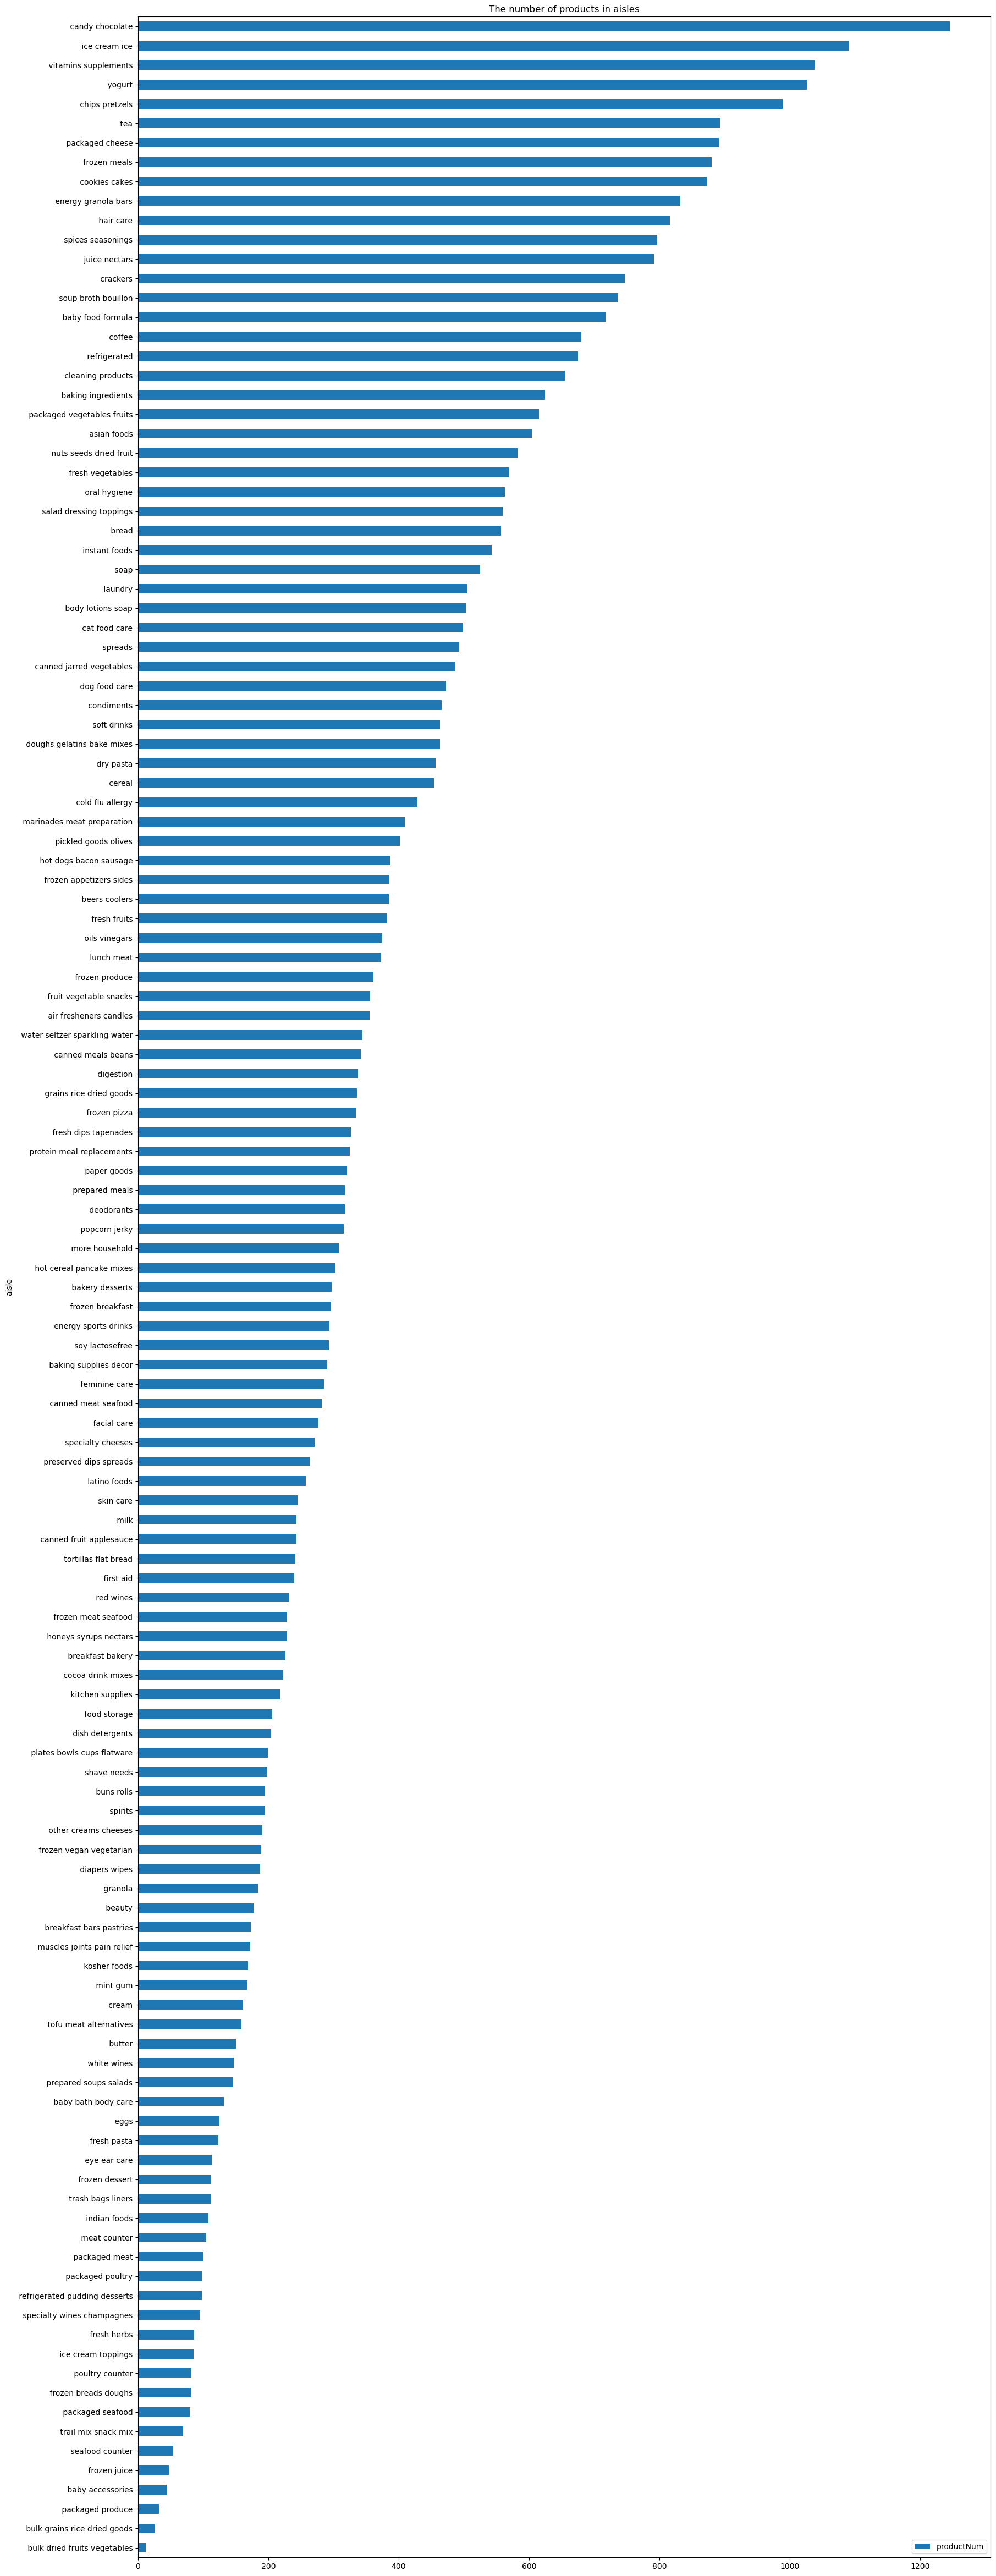

In [54]:
ax1 = products_per_aisleNew_sorted.sort_values('productNum',ascending = True).plot(kind='barh',x='aisle', y='productNum', rot=0,figsize=(20,60))
plt.title("The number of products in aisles")
plt.show()

In [55]:
products_per_aisleNew_sorted_Top10 = products_per_aisleNew_sorted[0:10]
products_per_aisleNew_sorted_Top10

,aisle,productNum
18,candy chocolate,1246
71,ice cream ice,1091
129,vitamins supplements,1038
132,yogurt,1026
25,chips pretzels,989
124,tea,894
93,packaged cheese,891
59,frozen meals,880
31,cookies cakes,874
42,energy granola bars,832


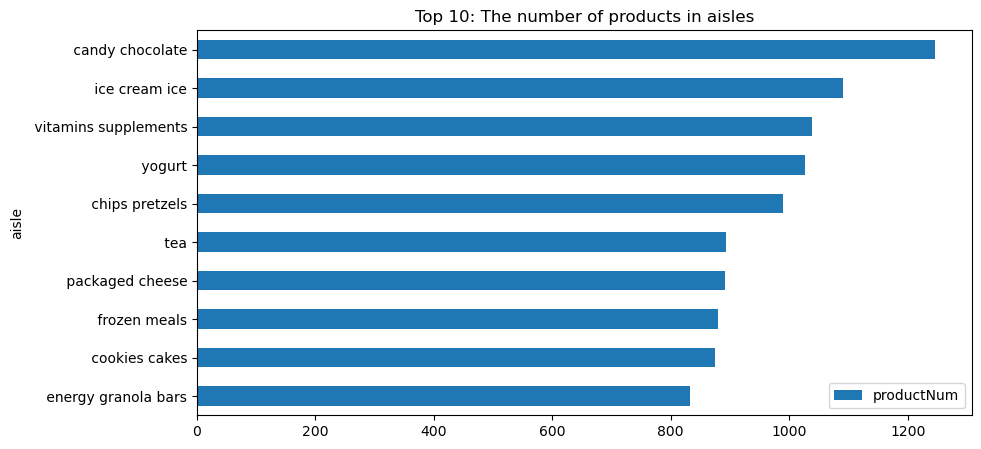

In [56]:
ax5 = products_per_aisleNew_sorted_Top10.sort_values('productNum',ascending = True).plot(kind='barh',x='aisle', y='productNum',figsize=(10,5))
plt.title("Top 10: The number of products in aisles")
plt.show()

In [57]:
products_per_aisleNew_sorted_Least10 = products_per_aisleNew_sorted.tail(10)
products_per_aisleNew_sorted_Least10

,aisle,productNum
103,poultry counter,82
55,frozen breads doughs,81
97,packaged seafood,80
127,trail mix snack mix,69
112,seafood counter,54
58,frozen juice,47
2,baby accessories,44
96,packaged produce,32
15,bulk grains rice dried goods,26
14,bulk dried fruits vegetables,12


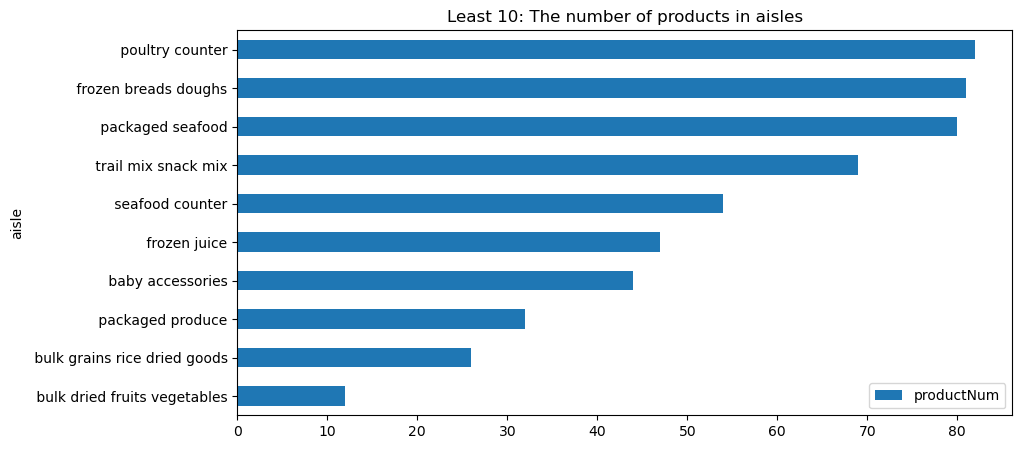

In [75]:
ax10 = products_per_aisleNew_sorted_Least10.sort_values('productNum',ascending = True).plot(kind='barh',x='aisle', y='productNum',figsize=(10,5))
plt.title("Least 10: The number of products in aisles")
plt.show()

In [58]:
# Question 5: What is the distribution of departments of total orders?

In [59]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19.0
1,2,All-Seasons Salt,104,13.0
2,3,Robust Golden Unsweetened Oolong Tea,94,7.0
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1.0
4,5,Green Chile Anytime Sauce,5,13.0
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5.0
49684,49685,En Croute Roast Hazelnut Cranberry,42,1.0
49685,49686,Artisan Baguette,112,3.0
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8.0


In [60]:
merged_orders_train_products_departments = pd.merge(pd.merge(pd.merge(orders,order_products__train,on = 'order_id'),products,on = 'product_id'),departments_duplicate_deleted,on = 'department_id')
merged_orders_train_products_departments

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7.0,beverages
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7.0,beverages
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7.0,beverages
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7.0,beverages
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7.0,beverages
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32433671,2939884,130327,prior,3,1,13,0.0,27414,5,0,Organic Emmer Farro,68,10.0,bulk
32433672,3267360,150683,prior,1,5,16,NaN,27414,13,0,Organic Emmer Farro,68,10.0,bulk
32433673,414077,159238,prior,9,6,12,8.0,27414,1,0,Organic Emmer Farro,68,10.0,bulk
32433674,813243,171675,prior,13,2,6,13.0,27414,34,0,Organic Emmer Farro,68,10.0,bulk


In [61]:
orders_per_department_distribution = merged_orders_train_products_departments.groupby('department')['order_id'].nunique().reset_index(name='orderNum')
orders_per_department_distribution

,department,orderNum
0,alcohol,84689
1,babies,177712
2,bakery,881556
3,beverages,1457351
4,breakfast,525188
5,bulk,33802
6,canned goods,681305
7,dairy eggs,2177338
8,deli,770300
9,dry goods pasta,597862


In [62]:
orders_per_department_distribution_sorted = orders_per_department_distribution.sort_values('orderNum',ascending = False)
orders_per_department_distribution_sorted

,department,orderNum
19,produce,2409320
7,dairy eggs,2177338
3,beverages,1457351
20,snacks,1391447
10,frozen,1181018
16,pantry,1117892
2,bakery,881556
8,deli,770300
6,canned goods,681305
9,dry goods pasta,597862


In [76]:
orders_per_department_distribution_sorted_delete = orders_per_department_distribution_sorted.drop(14)
orders_per_department_distribution_sorted_delete = orders_per_department_distribution_sorted_delete.drop(15)
orders_per_department_distribution_sorted_delete

,department,orderNum
19,produce,2409320
7,dairy eggs,2177338
3,beverages,1457351
20,snacks,1391447
10,frozen,1181018
16,pantry,1117892
2,bakery,881556
8,deli,770300
6,canned goods,681305
9,dry goods pasta,597862


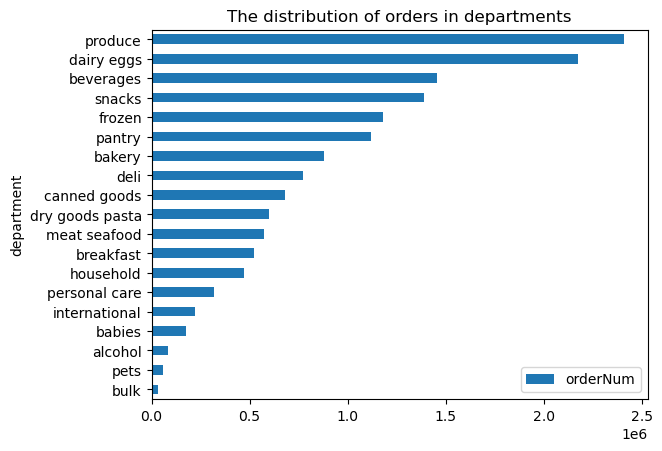

In [77]:
ax3 = orders_per_department_distribution_sorted_delete.sort_values('orderNum',ascending = True).plot(kind='barh',x='department', y='orderNum', rot=0)
plt.title("The distribution of orders in departments")
plt.show()

In [64]:
# Question 6: What is the distribution of days since prior orders? 

In [65]:
days_since_prior_order_distribution = orders[["days_since_prior_order","user_id"]].groupby("days_since_prior_order").size().reset_index(name='userNum')
days_since_prior_order_distribution

,days_since_prior_order,userNum
0,0.0,67755
1,1.0,145247
2,2.0,193206
3,3.0,217005
4,4.0,221696
5,5.0,214503
6,6.0,240013
7,7.0,320608
8,8.0,181717
9,9.0,118188


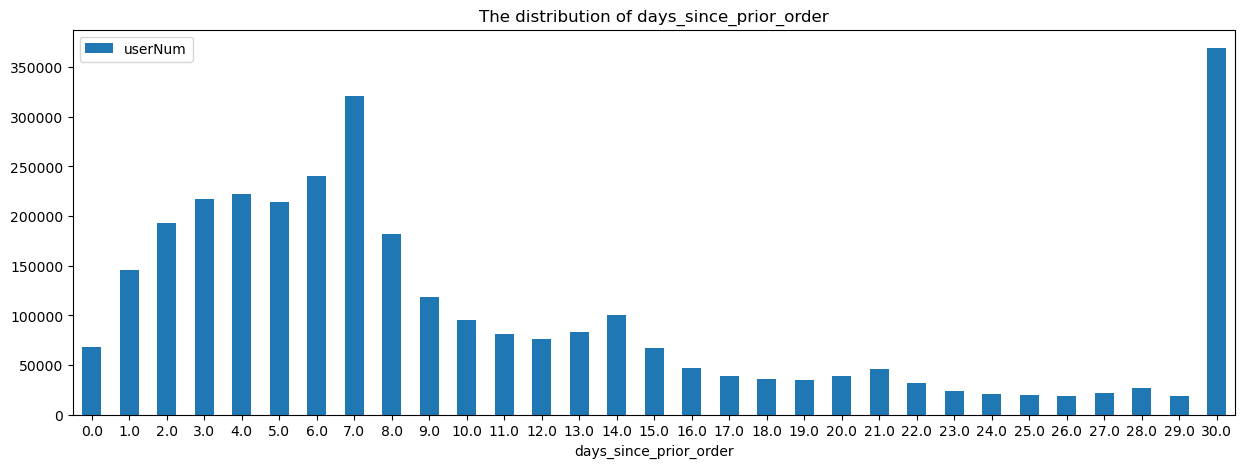

In [66]:
ax4 = days_since_prior_order_distribution.plot(kind='bar',x='days_since_prior_order', y='userNum', rot=0,figsize=(15,5))
plt.title("The distribution of days_since_prior_order")
plt.show()

In [67]:
# Question 7 : think of a heat map
# What is the distribution of the number of orders 
# based on the day of the week and the hour of the day?

In [68]:
merged_orders_trains = orders.merge(order_products__train, on='order_id')
merged_orders_trains

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0
...,...,...,...,...,...,...,...,...,...,...
32434484,2977660,206209,prior,13,1,12,7.0,14197,5,1
32434485,2977660,206209,prior,13,1,12,7.0,38730,6,0
32434486,2977660,206209,prior,13,1,12,7.0,31477,7,0
32434487,2977660,206209,prior,13,1,12,7.0,6567,8,0


In [69]:
order_counts = merged_orders_trains.groupby(['order_dow', 'order_hour_of_day']).size().reset_index(name='ordersNum')
order_counts

,order_dow,order_hour_of_day,ordersNum
0,0,0,38876
1,0,1,22523
2,0,2,12725
3,0,3,8851
4,0,4,8372
...,...,...,...
163,6,19,171797
164,6,20,131300
165,6,21,112219
166,6,22,91943


In [70]:
# order_distribution = order_counts.unstack()
result = order_counts.pivot(index = "order_dow", columns = 'order_hour_of_day',values = 'ordersNum')
reshaped_df = result.stack().reset_index()

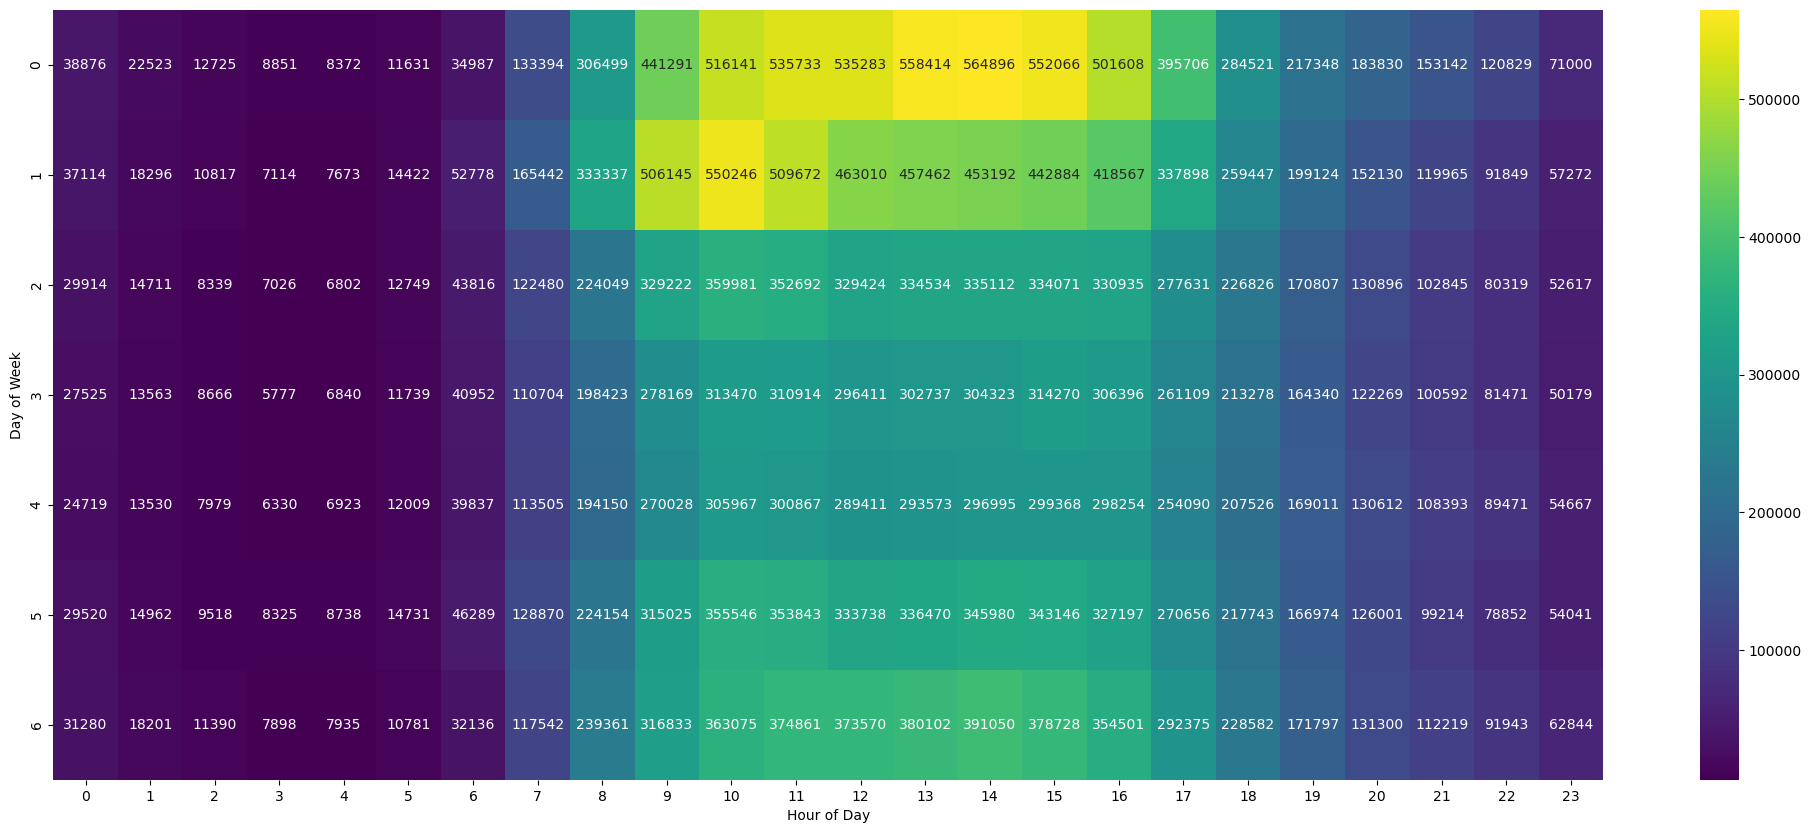

In [71]:
plt.figure(figsize=(25, 10))
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()


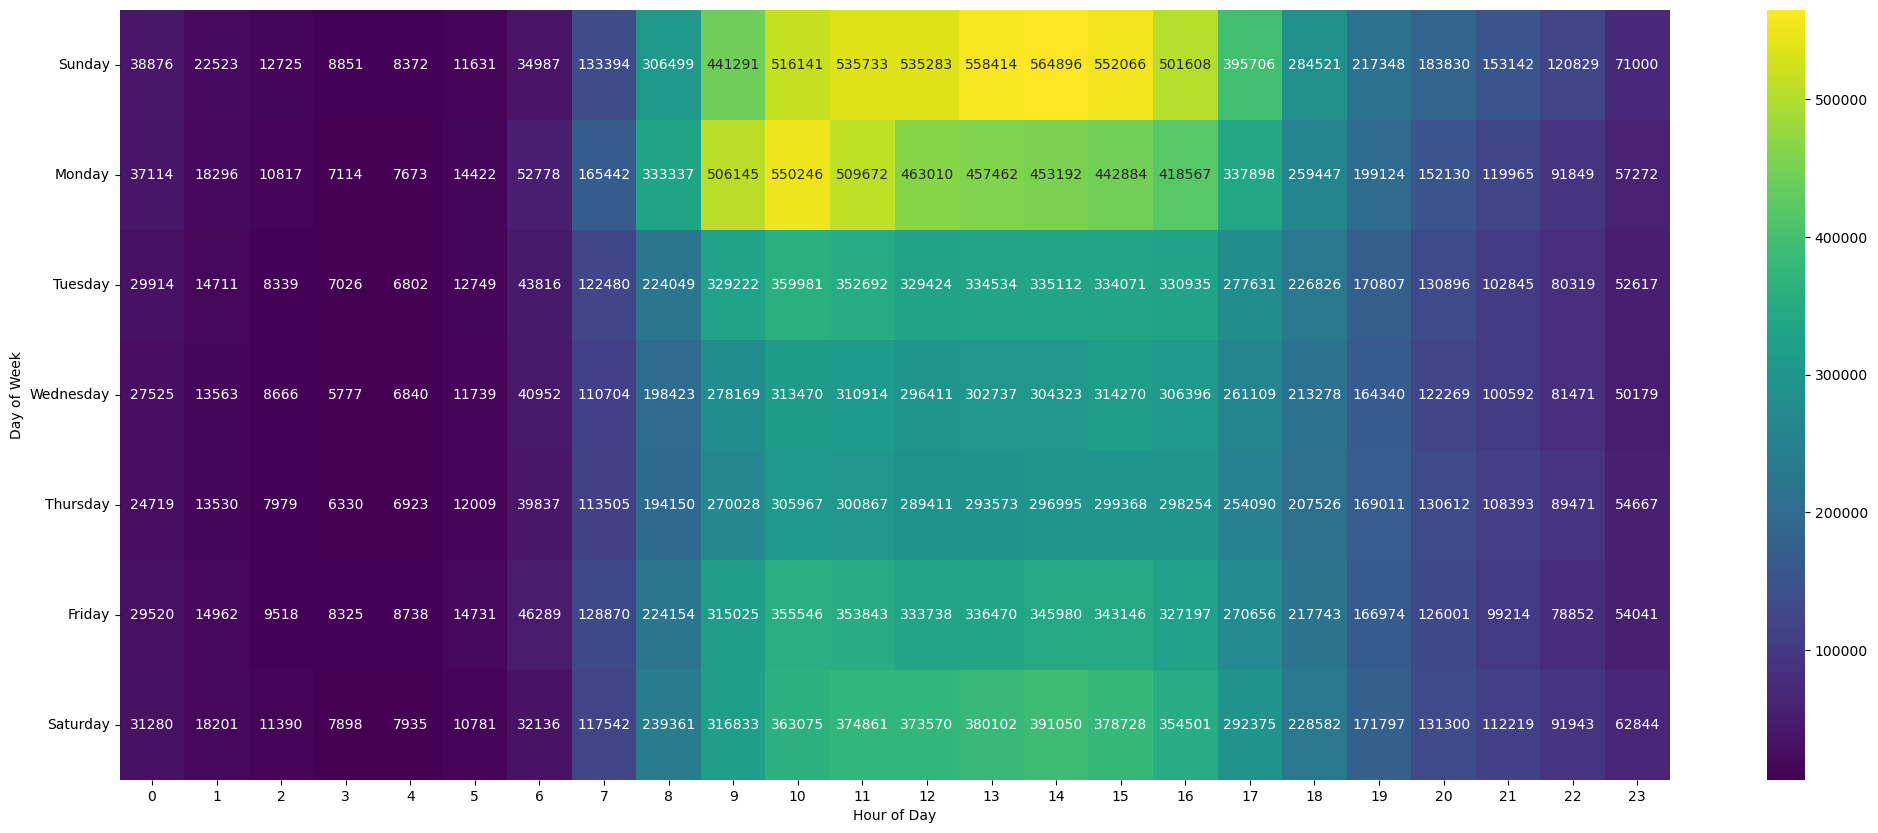

In [72]:
plt.figure(figsize=(35, 15))
ax = sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
days_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# adjusting y-labels directly to the numbers inside the heatmap
ax.set_yticklabels(days_of_week, rotation=0, ha='right')

plt.show()
